In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# example image
image_path = 'Data/Sentinel-s004/RGB/RGB_el2_2016_2.jpg'

Ipython Widget, Display Image and Select Boundary!

In [2]:
# %pip install ipympl

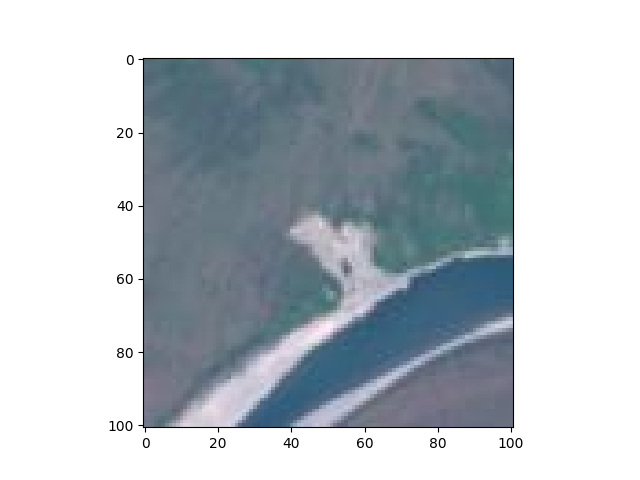

In [3]:
from scipy.interpolate import splprep, splev

# widget backend for interactive plots
%matplotlib widget

# point list
points = []
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib

def onclick(event):
    global points, img_copy
    
    # store click point
    if event.xdata is not None and event.ydata is not None:
        points.append([event.xdata, event.ydata])
        plt.plot(event.xdata, event.ydata, 'ro')
        plt.draw()

# display the image, add mouse click event
fig, ax = plt.subplots()
ax.imshow(img)
cid = fig.canvas.mpl_connect('button_press_event', onclick)

plt.show()

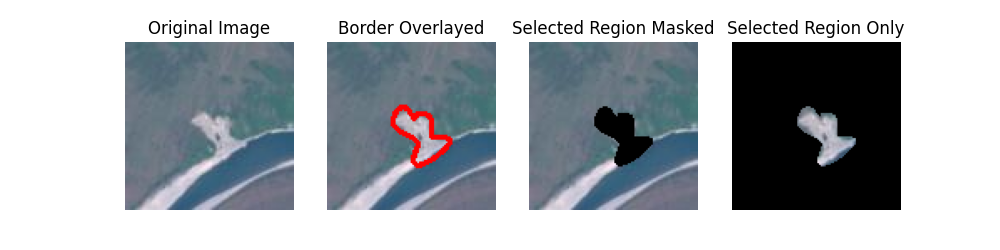

In [4]:
# disconnetc & close figure
fig.canvas.mpl_disconnect(cid)
plt.close(fig)

points = np.array(points)
if len(points) > 2 and not np.array_equal(points[0], points[-1]):
    points = np.vstack([points, points[0]])

# ensure we can close the loop
if len(points) > 2 and not np.array_equal(points[0], points[-1]):
    points = np.vstack([points, points[0]])

# convert to spline, then smooth
tck, u = splprep([points[:, 0], points[:, 1]], s=0, per=True)
new_points = splev(np.linspace(0, 1, 1000), tck)
spline_points = np.vstack(new_points).T.astype(np.int32)

# 2. RED border overlay
border_overlay_img = img.copy()
cv2.polylines(border_overlay_img, [spline_points], isClosed=True, color=(255, 0, 0), thickness=2)

# 3. non-selected region
mask_black = np.zeros_like(img)
cv2.fillPoly(mask_black, [spline_points], color=(255, 255, 255))
selected_region_masked = cv2.bitwise_and(img, cv2.bitwise_not(mask_black))  # invert the mask and apply it

# 4. selected region
selected_region_only = cv2.bitwise_and(img, mask_black)  # apply the mask directly

fig, axs = plt.subplots(1, 4, figsize=(10, 2.5))

# original
axs[0].imshow(img)
axs[0].set_title("Original Image")
axs[0].axis('off')

# RED border overlay
axs[1].imshow(border_overlay_img)
axs[1].set_title("Border Overlayed")
axs[1].axis('off')

# non-selected region
axs[2].imshow(selected_region_masked)
axs[2].set_title("Selected Region Masked")
axs[2].axis('off')

# selected region
axs[3].imshow(selected_region_only)
axs[3].set_title("Selected Region Only")
axs[3].axis('off')

plt.show()

Total Image Area: 1000 Sq. Mils


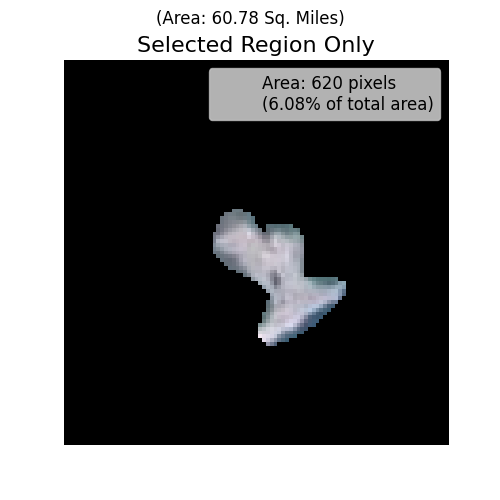

In [5]:
# area calculations
bounded_area = np.sum(mask_black[:, :, 0] == 255)
total_area = img.shape[0] * img.shape[1]
percentage_area = (bounded_area / total_area) * 100

IMAGE_TOTAL_AREA = 1_000 #sq miles, just an example
print(f"Total Image Area: {IMAGE_TOTAL_AREA} Sq. Mils")

plt.figure(figsize=(5, 5))
plt.imshow(selected_region_only)
plt.title("Selected Region Only", fontsize=16)
plt.suptitle(f"(Area: {(IMAGE_TOTAL_AREA*percentage_area/100):.2f} Sq. Miles)", fontsize=12)

dummy_plot, = plt.plot([], [], ' ', label=f"Area: {bounded_area} pixels\n({percentage_area:.2f}% of total area)")
plt.legend(handles=[dummy_plot], loc='upper right', fontsize=12, frameon=True, facecolor='white', framealpha=0.7)

plt.axis('off')
plt.show()

OpenCV Image Clicking (Fallback for Ipython Widgets)

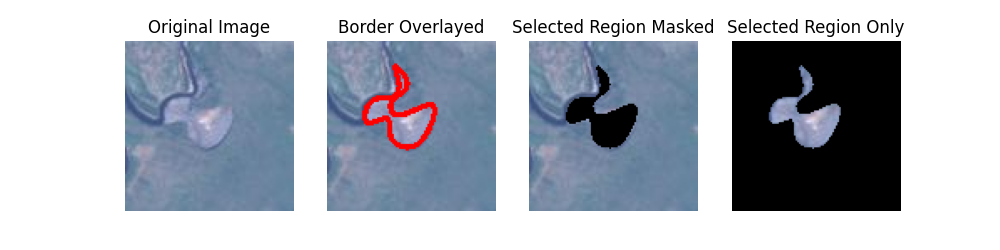

In [21]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import splprep, splev

# point list
points = []
img = cv2.imread(image_path)
img_copy = img.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib


def click_event(event, x, y, flags, param):
    global points, img_copy
    
    # On left mouse click --> store the point
    if event == cv2.EVENT_LBUTTONDOWN:
        points.append((x, y))
        cv2.circle(img_copy, (x, y), 3, (0, 0, 255), -1)
        cv2.imshow("Image", img_copy)

# display, set mouse callback function
cv2.imshow("Image", img_copy)
cv2.setMouseCallback("Image", click_event)

# any key press to continue
cv2.waitKey(0)
cv2.destroyAllWindows()

points = np.array(points)

# ensure we can close the loop
if len(points) > 2 and not np.array_equal(points[0], points[-1]):
    points = np.vstack([points, points[0]])

# convert to spline, then smooth
tck, u = splprep([points[:, 0], points[:, 1]], s=0, per=True)
new_points = splev(np.linspace(0, 1, 1000), tck)
spline_points = np.vstack(new_points).T.astype(np.int32)

# 2. RED border overlay
border_overlay_img = img.copy()
cv2.polylines(border_overlay_img, [spline_points], isClosed=True, color=(255, 0, 0), thickness=2)

# 3. non-selected region
mask_black = np.zeros_like(img)
cv2.fillPoly(mask_black, [spline_points], color=(255, 255, 255))
selected_region_masked = cv2.bitwise_and(img, cv2.bitwise_not(mask_black))  # invert the mask and apply it

# 4. selected region
selected_region_only = cv2.bitwise_and(img, mask_black)  # apply the mask directly

fig, axs = plt.subplots(1, 4, figsize=(10, 2.5))

# original
axs[0].imshow(img)
axs[0].set_title("Original Image")
axs[0].axis('off')

# RED border overlay
axs[1].imshow(border_overlay_img)
axs[1].set_title("Border Overlayed")
axs[1].axis('off')

# non-selected region
axs[2].imshow(selected_region_masked)
axs[2].set_title("Selected Region Masked")
axs[2].axis('off')

# selected region
axs[3].imshow(selected_region_only)
axs[3].set_title("Selected Region Only")
axs[3].axis('off')

plt.show()